# Capstone #2 Notebook - two 'types' (after resampling)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords 
import string
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

First, resize the dataset from 1,000,000 articles to 10,000 articles that are either 'fake' or 'reliable'

In [3]:
c_size = 100000

listofchunks = []
for chunk in pd.read_csv("sampled_data1.csv",chunksize=c_size, lineterminator='\n', index_col=[0]):
    print(chunk.shape)
    listofchunks.append(chunk)

(100000, 16)
(100000, 16)
(100000, 16)
(100000, 16)
(100000, 16)
(100000, 16)
(100000, 16)
(100000, 16)
(100000, 16)
(100000, 16)


In [4]:
df_concat = pd.concat(listofchunks)


In [5]:
df_concat.shape

(1000000, 16)

In [7]:
df_concat.head(20)

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
Unnamed: 0,,,,,,,,,,,,,,,,
3071,5743751,dailykos.com,political,https://www.dailykos.com/stories/2011/9/8/1014...,"The other political party, the Republicans beg...",2017-11-27T01:14:21.395055,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Congratulations,"Backgroundurl Avatar_Large, Nickname, Joined, ...",NaN,[''],NaN,NaN,NaN,NaN
6898,5117421,libertyunyielding.com,bias,https://libertyunyielding.com/2017/04/15/self-...,Richard Fochtmann (Image via BizPac Review )\n...,2017-11-27T01:14:42.983556,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Self-hating Dem caught on video laughing and j...,"Bee Shapiro, Nyt, Isabel Vincent, Ny Post, Oc ...",NaN,[''],NaN,NaN,NaN,NaN
5081,7214188,nationalreview.com,political,http://www.nationalreview.com/node/152734/%E2%...,Plus one article on Google Plus\n\n(Thanks to ...,2017-11-27T01:14:42.983556,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Iran News Round Up,NaN,NaN,"['National Review', 'National Review Online', ...",NaN,NaN,NaN,NaN
8862,4180834,rawstory.com,political,https://www.rawstory.com/2017/04/scientists-ju...,A diver films a reef affected by bleaching off...,2017-11-27T01:15:02.476695,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Scientists just confirmed the Great Barrier Re...,"Climate Central, About The Author",NaN,[''],NaN,NaN,NaN,NaN
7655,7709307,nationalreview.com,political,http://www.nationalreview.com/node/339236/print,Funny as a Crutch\n\nBy Terry Teachout — March...,2017-12-09T22:10:08.302997,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,National Review Online,"Terry Teachout, March",NaN,[''],NaN,NaN,NaN,NaN
8349,236533,wikispooks.com,conspiracy,https://wikispooks.com/wiki/Special:SearchByPr...,Search by property\n\nA list of all pages that...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Search by property,NaN,NaN,[''],NaN,NaN,NaN,NaN
9386,2858594,weaselzippers.us,unreliable,https://www.weaselzippers.us/364527-one-third-...,The rest were looking for love.\n\nVia Breitba...,2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,One-Third Of 214 Arrested MS-13 Gangsters Were...,NaN,NaN,[''],NaN,NaN,NaN,NaN
1843,9871184,nytimes.com,reliable,https://www.nytimes.com/2017/12/04/dining/king...,Photo\n\nAs hands-on as you may be in the kitc...,2018-02-11 00:49:45.587013,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,A Shortcut for Fruitcakes and Holiday Sweets,"Florence Fabricant, Front Burner, Amanda Hesse...",NaN,"['Cooking and Cookbooks', 'King Arthur Flour',...",A follow-up fruitcake mix from King Arthur Flo...,NaN,NaN,nytimes
4647,3434662,lifenews.com,bias,https://consciouslifenews.com/tag/keep-your-ki...,FAIR USE NOTICE. Many of the stories on this s...,2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,keep your kids safe Archives,NaN,NaN,[''],NaN,NaN,NaN,NaN


In [9]:
new_df = df_concat[(df_concat['type'] == 'reliable') | (df_concat['type'] == 'fake') ]

In [10]:
new_df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
Unnamed: 0,,,,,,,,,,,,,,,,
1843,9871184,nytimes.com,reliable,https://www.nytimes.com/2017/12/04/dining/king...,Photo\n\nAs hands-on as you may be in the kitc...,2018-02-11 00:49:45.587013,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,A Shortcut for Fruitcakes and Holiday Sweets,"Florence Fabricant, Front Burner, Amanda Hesse...",NaN,"['Cooking and Cookbooks', 'King Arthur Flour',...",A follow-up fruitcake mix from King Arthur Flo...,NaN,NaN,nytimes
9283,76058,beforeitsnews.com,fake,http://beforeitsnews.com/financial-markets/201...,The Anatomy of a Market Breakout-Remount Setup...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,The Anatomy of a Market Breakout-Remount Setup...,Bulls On Wall Street,NaN,[''],NaN,NaN,NaN,NaN
1816,8960875,nytimes.com,reliable,https://www.nytimes.com/2006/09/15/business/15...,"Segway is recalling all 23,500 of the self-bal...",2018-02-11 00:40:45.538112,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Segway Recalls All Its Scooters,The Associated Press,NaN,"['Segway', 'Recalls and Bans of Products', 'Mo...",Segway is recalling its self-balancing scooter...,NaN,NaN,nytimes
1466,8430525,nytimes.com,reliable,https://www.nytimes.com/2001/01/13/business/wo...,"DaimlerChrysler A.G., the big automaker based ...",2018-02-11 00:35:39.843517,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,DAIMLERCHRYSLER COMMERCIAL SALES RISE,Ed Andrews,NaN,['FAR EAST SOUTH AND SOUTHEAST ASIA AND PACIF...,DaimlerChrysler AG says its sales of commercia...,NaN,NaN,nytimes
2981,8982040,nytimes.com,reliable,https://www.nytimes.com/2006/11/18/business/18...,A federal appeals court has decided to review ...,2018-02-11 00:40:58.785785,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,U.S. Court to Review Lawsuit by Smokers,NaN,NaN,"['Smoking and Tobacco', 'Suits and Litigation'...",An appeals court will review a lower court rul...,NaN,NaN,nytimes


In [12]:
new_df.shape

(328669, 16)

In [13]:
fake_new_df = new_df[new_df['type']== 'fake'].sample(n=10000, random_state=0)


In [14]:
fake_new_df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
Unnamed: 0,,,,,,,,,,,,,,,,
8124,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN
1824,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN,NaN,NaN,NaN
6585,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN,NaN,NaN,NaN
8109,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN,NaN,NaN,NaN
6802,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN,NaN,NaN,NaN


In [15]:
reliable_new_df = new_df[new_df['type']== 'reliable'].sample(n=10000, random_state=0)



In [16]:
reliable_new_df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
Unnamed: 0,,,,,,,,,,,,,,,,
6243,8565302,nytimes.com,reliable,https://www.nytimes.com/2002/06/12/world/castr...,President Fidel Castro of Cuba has called for ...,2018-02-11 00:36:49.247979,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Castro Calls March Against Bush's Criticism,NaN,NaN,"['CUBA', 'CASTRO FIDEL', 'BUSH GEORGE W', 'U...",Pres Fidel Castro calls for massive marches by...,NaN,NaN,nytimes
5016,9094077,nytimes.com,reliable,https://www.nytimes.com/2007/11/16/us/16missis...,"State officials, from Gov. Haley Barbour on do...",2018-02-11 00:42:02.956512,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"In Mississippi, Poor Lag in Hurricane Aid",Leslie Eaton,NaN,"['Mississippi', 'Hurricane Katrina', 'Federal ...",The state is the only one for which the White ...,NaN,NaN,nytimes
1433,8177850,in.reuters.com,reliable,http://in.reuters.com/video/2016/11/06/prisone...,Prisoners get out of jail for papal Mass at Va...,2016-11-06T21:31:24.468+02:00,2018-02-10 13:43:39.521661,2018-02-10 13:43:39.521686,Prisoners get out of jail for papal Mass at Va...,NaN,NaN,NaN,NaN,NaN,NaN,webhose
5821,9344883,nytimes.com,reliable,https://www.nytimes.com/2010/07/17/opinion/lwe...,To the Editor:\n\nRe “Toyota Concedes 2 Flaws ...,2018-02-11 00:44:30.539865,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Actions Taken by Toyota,NaN,NaN,"['Toyota Motor Corp', 'Automobile Safety Featu...",A reader responds to a recent article.,NaN,NaN,nytimes
2596,9461692,nytimes.com,reliable,https://www.nytimes.com/2011/12/02/business/fo...,“He is pushing them in a totally different dir...,2018-02-11 00:45:38.510127,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,Ford Strives for Elegance in Lincoln Brand,Bill Vlasic,NaN,"['Ford Motor Company', 'Lincoln Division of Fo...",The automaker is striving to restore the luste...,NaN,NaN,nytimes


In [17]:
complete_new_df = pd.concat([fake_new_df, reliable_new_df])

In [18]:
complete_new_df.shape

(20000, 16)

In [21]:
complete_new_df.to_csv('complete_new_data.csv', index=False)

In [18]:
df = pd.read_csv('complete_new_data.csv')

In [19]:
df.shape

(20000, 16)

In [20]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN,NaN,NaN,NaN
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN,NaN,NaN,NaN
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN,NaN,NaN,NaN
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN,NaN,NaN,NaN


In [21]:
df = df.rename_axis('document')

In [22]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
document,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN,NaN,NaN,NaN
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN,NaN,NaN,NaN
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN,NaN,NaN,NaN
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN,NaN,NaN,NaN


There is little useful information in the columns 'Unnamed:', 'tags', 'summary', and 'source'. Drop these columns.

In [23]:
df.drop(['tags', 'summary', 'source'], axis=1)

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description
document,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mother...,"(Before It's News)\n\nOkay, so I have had one ...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politic...,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by Penny...",NaN,NaN,[''],NaN
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/0...,Headline: Bitcoin & Blockchain Searches Exceed...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Barona Band of Mission Indians Commemorates 80...,NaN,NaN,[''],NaN
3,7141957,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2015/09/go-fo...,Go for it\n\n(Before It's News)\n\nThe morning...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Go for it,Greater Fool,NaN,[''],NaN
4,4669035,beforeitsnews.com,fake,http://beforeitsnews.com/economy/2011/02/irish...,Irish bank flight quickens despite EU rescue\n...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Irish bank flight quickens despite EU rescue,Josey Wales,NaN,[''],NaN
5,6916755,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2011/0...,Chinese Drywall Complaint Center Urges Florida...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Chinese Drywall Complaint Center Urges Florida...,Pr Web,NaN,[''],NaN
6,6117241,beforeitsnews.com,fake,http://beforeitsnews.com/alternative/2017/04/m...,Maine pushes to make it harder for voter initi...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Maine pushes to make it harder for voter initi...,NaN,NaN,[''],NaN
7,5146269,beforeitsnews.com,fake,http://beforeitsnews.com/vietnamese/2014/03/6-...,% of readers think this story is Fact. Add you...,2017-11-27T01:14:08.7454,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,6 thông tin kinh tế nổi bật tuần từ 09/03 - 14/03,NaN,NaN,[''],NaN
8,6711496,beforeitsnews.com,fake,http://beforeitsnews.com/media/2014/11/high-re...,High-resolution geological map of asteroid Ves...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,High-resolution geological map of asteroid Ves...,The Watchers,NaN,[''],NaN


What are the different types of fake news represented in the dataset?

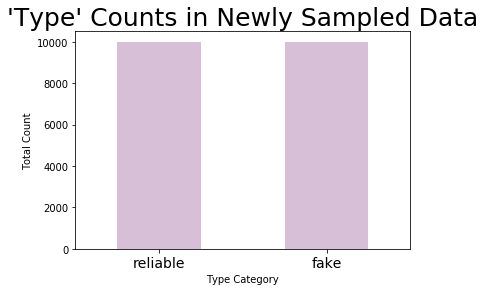

In [24]:
df.type.value_counts().plot(kind='bar', color='thistle')
plt.xlabel('Type Category')
plt.ylabel('Total Count')
plt.xticks(fontsize=14, rotation=0)
plt.title("'Type' Counts in Newly Sampled Data", fontsize=25)
plt.savefig('typecounts.png', bbox_inches='tight')

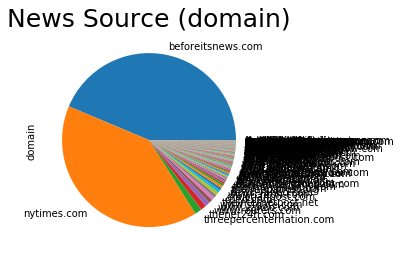

In [25]:

df.domain.value_counts().plot(kind='pie')
plt.title("News Source (domain)", fontsize=25)
plt.savefig('newssourcepie.png', bbox_inches='tight')

In [26]:
len(df.domain.unique())

141

Examine some 'content' values for the categories a little bit before delving into text analysis.

In [27]:
pd.set_option('display.max_colwidth', 1000)
print (df[df['type']=='fake']['content'].head())

document
0                                                                                                                                                                                                                                                                                                                                                                                                                           (Before It's News)\n\nOkay, so I have had one horrible, awful, no-good, terrible week. (That’s another post in itself, and not one I plan on writing.) To end the week on a positive note, I have some lucky winners to announce!\n\nRinse Hopper:\n\nKrysta S.\n\nHealthy Herbal Nutrients:\n\nRenee G.\n\nSimple Green:\n\nJennifer R.\n\nWholesale Costume Club:\n\nMarty H.\n\nMamaLOVE:\n\nRita O.\n\nKimochis:\n\nMelissa K.\n\nCongrats! Winners have all been e-mailed and have 48 hours to claim their prizes. Thanks so much to everyone who entered, and be on the look-out for more gre

In [28]:
print (df[df['type']=='reliable']['content'].head())

document
10000                President Fidel Castro of Cuba has called for ''massive marches'' on Wednesday to protest the Bush administration's hard-line policies against his government and support a move to declare socialist Cuba ''untouchable.''\n\nMr. Castro announced the demonstrations in a speech on Monday in which he rejected President Bush's calls for free elections and respect for human rights in Cuba.\n\n''We are not a military power, but a moral and patriotic one,'' Mr. Castro said, according to an article today in Granma, the Communist Party newspaper, ''a nation with a profound sentiment of justice and freedom that can only prosper with this socialist system.''\n\nCuba's economy has been buffeted. Venezuela has suspended much-needed oil shipments, consumer prices have risen and tourism has been slow. To make up for a reduced flow of dollars, the government recently began accepting the euro.\n\nBut rather than ease his stance against the United States, Mr. Castro been incr

The typology of different kinds of fake news is an interesting issue in this dataset.  Can a model classifier accurately predict the different kinds of fake news?  Is it better just to put all of the different kinds of fake news under one label?  The analysis will examine these issues.

## Analysis

## **Preprocessing**

**Convert text to lowercase.**

In [29]:
df['content'] = df['content'].str.lower()


**Tokenize the article text in the dataset.**

In [30]:
df['tokenized_content'] = df.apply(lambda row: nltk.word_tokenize(row["content"]), axis=1)

In [31]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokenized_content
document,,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(before it's news)\n\nokay, so i have had one horrible, awful, no-good, terrible week. (that’s another post in itself, and not one i plan on writing.) to end the week on a positive note, i have some lucky winners to announce!\n\nrinse hopper:\n\nkrysta s.\n\nhealthy herbal nutrients:\n\nrenee g.\n\nsimple green:\n\njennifer r.\n\nwholesale costume club:\n\nmarty h.\n\nmamalove:\n\nrita o.\n\nkimochis:\n\nmelissa k.\n\ncongrats! winners have all been e-mailed and have 48 hours to claim their prizes. thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[(, before, it, 's, news, ), okay, ,, so, i, have, had, one, horrible, ,, awful, ,, no-good, ,, terrible, week, ., (, that, ’, s, another, post, in, itself, ,, and, not, one, i, plan, on, writing, ., ), to, end, the, week, on, a, positive, note, ,, i, have, some, lucky, winners, to, announce, !, rinse, hopper, :, krysta, s., healthy, herbal, nutrients, :, renee, g., simple, green, :, jennifer, r., wholesale, costume, club, :, marty, h., mamalove, :, rita, o., kimochis, :, melissa, k., congrats, !, winners, have, all, been, e-mailed, and, have, 48, hours, to, claim, ...]"
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(crwe, pld, cw, chh) stocks in review by pennytobuck.com\n\n(before it's news)\n\ncrown equity holdings inc. (crwe) crown equity holdings inc. (crwe.ob) www.crownequityholdings.com,announced that it has launched two new online service companies. crwe direct and crwe real estate. with expertise in online solutions and marketing, crown equity holdings inc. has launched crwe real estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. the other is crwe direct (www.crwedirect.com), an online business-to-business (b2b) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. manufacturers may start downloading their product immediately, free of charge during the next six months. thereafter, there will be various annual fees. the listing process and image loading for both sites are user-friendly. commenting on the launch, “the 2010 u.s. census data shows estimates for b2b revenues transacted...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com",NaN,NaN,[''],NaN,NaN,NaN,NaN,"[(, crwe, ,, pld, ,, cw, ,, chh, ), stocks, in, review, by, pennytobuck.com, (, before, it, 's, news, ), crown, equity, holdings, inc., (, crwe, ), crown, equity, holdings, inc., (, crwe.ob, ), www.crownequityholdings.com, ,, announced, that, it, has, launched, two, new, online, service, companies, ., crwe, direct, and, crwe, real, estate, ., with, expertise, in, online, solutions, and, marketing, ,, crown, equity, holdings, inc., has, launched, crwe, real, estate, (, www.crwerealestate.com, ), to, provide, a, global, portal, for, property, listings, at, a, fee, of, only, $, $, 1, a, day, ., the, other, is, crwe, direct, (, www.crwedirect.com, ...]"
2,797849,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2012/08/barona-band-of-mission-indians-commemorates-80th-anniversary-of-the-beginning-of-the-barona-mission-2462350.html,"headline: bitcoin & blockchain searches exceed trump! blockchain stocks are next!\n\nsan diego, ca–(marketwire – aug 17, 2012) – the barona band of mission indians recently celebrated the 80th anniversary of th

**Remove punctuation from tokenized documents**

In [32]:
punctuation = string.punctuation


In [33]:
def remove_punc(row):
    tokens = row['tokenized_content']
    newtokens = [w for w in tokens if w.isalpha()]
    newtokens = [w for w in newtokens if w not in punctuation]
    return newtokens

df['no_punc_content'] = df.apply(remove_punc, axis=1)

In [34]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokenized_content,no_punc_content
document,,,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(before it's news)\n\nokay, so i have had one horrible, awful, no-good, terrible week. (that’s another post in itself, and not one i plan on writing.) to end the week on a positive note, i have some lucky winners to announce!\n\nrinse hopper:\n\nkrysta s.\n\nhealthy herbal nutrients:\n\nrenee g.\n\nsimple green:\n\njennifer r.\n\nwholesale costume club:\n\nmarty h.\n\nmamalove:\n\nrita o.\n\nkimochis:\n\nmelissa k.\n\ncongrats! winners have all been e-mailed and have 48 hours to claim their prizes. thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[(, before, it, 's, news, ), okay, ,, so, i, have, had, one, horrible, ,, awful, ,, no-good, ,, terrible, week, ., (, that, ’, s, another, post, in, itself, ,, and, not, one, i, plan, on, writing, ., ), to, end, the, week, on, a, positive, note, ,, i, have, some, lucky, winners, to, announce, !, rinse, hopper, :, krysta, s., healthy, herbal, nutrients, :, renee, g., simple, green, :, jennifer, r., wholesale, costume, club, :, marty, h., mamalove, :, rita, o., kimochis, :, melissa, k., congrats, !, winners, have, all, been, e-mailed, and, have, 48, hours, to, claim, ...]","[before, it, news, okay, so, i, have, had, one, horrible, awful, terrible, week, that, s, another, post, in, itself, and, not, one, i, plan, on, writing, to, end, the, week, on, a, positive, note, i, have, some, lucky, winners, to, announce, rinse, hopper, krysta, healthy, herbal, nutrients, renee, simple, green, jennifer, wholesale, costume, club, marty, mamalove, rita, kimochis, melissa, congrats, winners, have, all, been, and, have, hours, to, claim, their, prizes, thanks, so, much, to, everyone, who, entered, and, be, on, the, for, more, great, giveaways]"
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(crwe, pld, cw, chh) stocks in review by pennytobuck.com\n\n(before it's news)\n\ncrown equity holdings inc. (crwe) crown equity holdings inc. (crwe.ob) www.crownequityholdings.com,announced that it has launched two new online service companies. crwe direct and crwe real estate. with expertise in online solutions and marketing, crown equity holdings inc. has launched crwe real estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. the other is crwe direct (www.crwedirect.com), an online business-to-business (b2b) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. manufacturers may start downloading their product immediately, free of charge during the next six months. thereafter, there will be various annual fees. the listing process and image loading for both sites are user-friendly. commenting on the launch, “the 2010 u.s. census data shows estimates for b2b revenues transacted...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, CHH) Stocks in Review by PennyToBuck.com",NaN,NaN,[''],NaN,NaN,NaN,NaN,"[(, crwe, ,, pld, ,, cw, ,, chh, ), stocks, in, review, by, pennytobuck.com, (, before, it, 's, news, ), crown, equity, holdings, inc., (, crwe, ), crown, equity, holdings, inc., (, crwe.ob, ), www.crownequityholdings.com, ,, announced, that, it, has, launched, two, new, online, service, companies, ., crwe, direct, and, crwe, real, estate, ., with, expertise, in, online, solutions, and, marketing, ,, crown, equity, holdings, inc., has, launched, crwe, real, estate, (, www.

**Apply stemming to tokens.**

In [35]:
ps = PorterStemmer()


In [36]:
def stemmed_content(row):
    content = row['no_punc_content']
    stemmed_list = [ps.stem(word) for word in content]
    return (stemmed_list)

df['stemmed_words'] = df.apply(stemmed_content, axis=1)

In [37]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokenized_content,no_punc_content,stemmed_words
document,,,,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(before it's news)\n\nokay, so i have had one horrible, awful, no-good, terrible week. (that’s another post in itself, and not one i plan on writing.) to end the week on a positive note, i have some lucky winners to announce!\n\nrinse hopper:\n\nkrysta s.\n\nhealthy herbal nutrients:\n\nrenee g.\n\nsimple green:\n\njennifer r.\n\nwholesale costume club:\n\nmarty h.\n\nmamalove:\n\nrita o.\n\nkimochis:\n\nmelissa k.\n\ncongrats! winners have all been e-mailed and have 48 hours to claim their prizes. thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[(, before, it, 's, news, ), okay, ,, so, i, have, had, one, horrible, ,, awful, ,, no-good, ,, terrible, week, ., (, that, ’, s, another, post, in, itself, ,, and, not, one, i, plan, on, writing, ., ), to, end, the, week, on, a, positive, note, ,, i, have, some, lucky, winners, to, announce, !, rinse, hopper, :, krysta, s., healthy, herbal, nutrients, :, renee, g., simple, green, :, jennifer, r., wholesale, costume, club, :, marty, h., mamalove, :, rita, o., kimochis, :, melissa, k., congrats, !, winners, have, all, been, e-mailed, and, have, 48, hours, to, claim, ...]","[before, it, news, okay, so, i, have, had, one, horrible, awful, terrible, week, that, s, another, post, in, itself, and, not, one, i, plan, on, writing, to, end, the, week, on, a, positive, note, i, have, some, lucky, winners, to, announce, rinse, hopper, krysta, healthy, herbal, nutrients, renee, simple, green, jennifer, wholesale, costume, club, marty, mamalove, rita, kimochis, melissa, congrats, winners, have, all, been, and, have, hours, to, claim, their, prizes, thanks, so, much, to, everyone, who, entered, and, be, on, the, for, more, great, giveaways]","[befor, it, news, okay, so, i, have, had, one, horribl, aw, terribl, week, that, s, anoth, post, in, itself, and, not, one, i, plan, on, write, to, end, the, week, on, a, posit, note, i, have, some, lucki, winner, to, announc, rins, hopper, krysta, healthi, herbal, nutrient, rene, simpl, green, jennif, wholesal, costum, club, marti, mamalov, rita, kimochi, melissa, congrat, winner, have, all, been, and, have, hour, to, claim, their, prize, thank, so, much, to, everyon, who, enter, and, be, on, the, for, more, great, giveaway]"
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(crwe, pld, cw, chh) stocks in review by pennytobuck.com\n\n(before it's news)\n\ncrown equity holdings inc. (crwe) crown equity holdings inc. (crwe.ob) www.crownequityholdings.com,announced that it has launched two new online service companies. crwe direct and crwe real estate. with expertise in online solutions and marketing, crown equity holdings inc. has launched crwe real estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. the other is crwe direct (www.crwedirect.com), an online business-to-business (b2b) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. manufacturers may start downloading their product immediately, free of charge during the next six months. thereafter, there will be various annual fees. the listing process and image loading for both sites are user-friendly. commenting on the launch, “the 2010 u.s. census data shows estimates for b2b revenues transacted...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,"(CRWE, PLD, CW, 

**Remove stop words**

In [38]:
english_stopwords = set(stopwords.words('english'))


def remove_stop(row):
    tokens = row['stemmed_words']
    newtokens = [w for w in tokens if w not in english_stopwords]
    return newtokens

df['no_stop_stemmed'] = df.apply(remove_stop, axis=1)



In [39]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokenized_content,no_punc_content,stemmed_words,no_stop_stemmed
document,,,,,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(before it's news)\n\nokay, so i have had one horrible, awful, no-good, terrible week. (that’s another post in itself, and not one i plan on writing.) to end the week on a positive note, i have some lucky winners to announce!\n\nrinse hopper:\n\nkrysta s.\n\nhealthy herbal nutrients:\n\nrenee g.\n\nsimple green:\n\njennifer r.\n\nwholesale costume club:\n\nmarty h.\n\nmamalove:\n\nrita o.\n\nkimochis:\n\nmelissa k.\n\ncongrats! winners have all been e-mailed and have 48 hours to claim their prizes. thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,NaN,[''],NaN,NaN,NaN,NaN,"[(, before, it, 's, news, ), okay, ,, so, i, have, had, one, horrible, ,, awful, ,, no-good, ,, terrible, week, ., (, that, ’, s, another, post, in, itself, ,, and, not, one, i, plan, on, writing, ., ), to, end, the, week, on, a, positive, note, ,, i, have, some, lucky, winners, to, announce, !, rinse, hopper, :, krysta, s., healthy, herbal, nutrients, :, renee, g., simple, green, :, jennifer, r., wholesale, costume, club, :, marty, h., mamalove, :, rita, o., kimochis, :, melissa, k., congrats, !, winners, have, all, been, e-mailed, and, have, 48, hours, to, claim, ...]","[before, it, news, okay, so, i, have, had, one, horrible, awful, terrible, week, that, s, another, post, in, itself, and, not, one, i, plan, on, writing, to, end, the, week, on, a, positive, note, i, have, some, lucky, winners, to, announce, rinse, hopper, krysta, healthy, herbal, nutrients, renee, simple, green, jennifer, wholesale, costume, club, marty, mamalove, rita, kimochis, melissa, congrats, winners, have, all, been, and, have, hours, to, claim, their, prizes, thanks, so, much, to, everyone, who, entered, and, be, on, the, for, more, great, giveaways]","[befor, it, news, okay, so, i, have, had, one, horribl, aw, terribl, week, that, s, anoth, post, in, itself, and, not, one, i, plan, on, write, to, end, the, week, on, a, posit, note, i, have, some, lucki, winner, to, announc, rins, hopper, krysta, healthi, herbal, nutrient, rene, simpl, green, jennif, wholesal, costum, club, marti, mamalov, rita, kimochi, melissa, congrat, winner, have, all, been, and, have, hour, to, claim, their, prize, thank, so, much, to, everyon, who, enter, and, be, on, the, for, more, great, giveaway]","[befor, news, okay, one, horribl, aw, terribl, week, anoth, post, one, plan, write, end, week, posit, note, lucki, winner, announc, rins, hopper, krysta, healthi, herbal, nutrient, rene, simpl, green, jennif, wholesal, costum, club, marti, mamalov, rita, kimochi, melissa, congrat, winner, hour, claim, prize, thank, much, everyon, enter, great, giveaway]"
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(crwe, pld, cw, chh) stocks in review by pennytobuck.com\n\n(before it's news)\n\ncrown equity holdings inc. (crwe) crown equity holdings inc. (crwe.ob) www.crownequityholdings.com,announced that it has launched two new online service companies. crwe direct and crwe real estate. with expertise in online solutions and marketing, crown equity holdings inc. has launched crwe real estate (www.crwerealestate.com) to provide a global portal for property listings at a fee of only $$1 a day. the other is crwe direct (www.crwedirect.com), an online business-to-business (b2b) marketplace for manufacturers and small to large businesses to purchase various types of merchandise. manufacturers may start downloading their product

Save preprocessed data to .csv just in case.

## Classification ##

**1. Create Count Vectorizer**

Rejoin lists of words in the 'no_stop_stemmed' column.

In [40]:
def rejoin(row):
    my_list = row['no_stop_stemmed']
    joined_text = ( " ".join(my_list))
    return joined_text

df['pre_processed_text'] = df.apply(rejoin, axis=1)

In [41]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,...,meta_keywords,meta_description,tags,summary,source,tokenized_content,no_punc_content,stemmed_words,no_stop_stemmed,pre_processed_text
document,,,,,,,,,,,,,,,,,,,,,
0,6046549,beforeitsnews.com,fake,http://beforeitsnews.com/family/2012/05/mothers-day-weekend-winners-2126719.html,"(before it's news)\n\nokay, so i have had one horrible, awful, no-good, terrible week. (that’s another post in itself, and not one i plan on writing.) to end the week on a positive note, i have some lucky winners to announce!\n\nrinse hopper:\n\nkrysta s.\n\nhealthy herbal nutrients:\n\nrenee g.\n\nsimple green:\n\njennifer r.\n\nwholesale costume club:\n\nmarty h.\n\nmamalove:\n\nrita o.\n\nkimochis:\n\nmelissa k.\n\ncongrats! winners have all been e-mailed and have 48 hours to claim their prizes. thanks so much to everyone who entered, and be on the look-out for more great giveaways!",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Mother’s Day Weekend WINNERS!,Brandy At,...,[''],NaN,NaN,NaN,NaN,"[(, before, it, 's, news, ), okay, ,, so, i, have, had, one, horrible, ,, awful, ,, no-good, ,, terrible, week, ., (, that, ’, s, another, post, in, itself, ,, and, not, one, i, plan, on, writing, ., ), to, end, the, week, on, a, positive, note, ,, i, have, some, lucky, winners, to, announce, !, rinse, hopper, :, krysta, s., healthy, herbal, nutrients, :, renee, g., simple, green, :, jennifer, r., wholesale, costume, club, :, marty, h., mamalove, :, rita, o., kimochis, :, melissa, k., congrats, !, winners, have, all, been, e-mailed, and, have, 48, hours, to, claim, ...]","[before, it, news, okay, so, i, have, had, one, horrible, awful, terrible, week, that, s, another, post, in, itself, and, not, one, i, plan, on, writing, to, end, the, week, on, a, positive, note, i, have, some, lucky, winners, to, announce, rinse, hopper, krysta, healthy, herbal, nutrients, renee, simple, green, jennifer, wholesale, costume, club, marty, mamalove, rita, kimochis, melissa, congrats, winners, have, all, been, and, have, hours, to, claim, their, prizes, thanks, so, much, to, everyone, who, entered, and, be, on, the, for, more, great, giveaways]","[befor, it, news, okay, so, i, have, had, one, horribl, aw, terribl, week, that, s, anoth, post, in, itself, and, not, one, i, plan, on, write, to, end, the, week, on, a, posit, note, i, have, some, lucki, winner, to, announc, rins, hopper, krysta, healthi, herbal, nutrient, rene, simpl, green, jennif, wholesal, costum, club, marti, mamalov, rita, kimochi, melissa, congrat, winner, have, all, been, and, have, hour, to, claim, their, prize, thank, so, much, to, everyon, who, enter, and, be, on, the, for, more, great, giveaway]","[befor, news, okay, one, horribl, aw, terribl, week, anoth, post, one, plan, write, end, week, posit, note, lucki, winner, announc, rins, hopper, krysta, healthi, herbal, nutrient, rene, simpl, green, jennif, wholesal, costum, club, marti, mamalov, rita, kimochi, melissa, congrat, winner, hour, claim, prize, thank, much, everyon, enter, great, giveaway]",befor news okay one horribl aw terribl week anoth post one plan write end week posit note lucki winner announc rins hopper krysta healthi herbal nutrient rene simpl green jennif wholesal costum club marti mamalov rita kimochi melissa congrat winner hour claim prize thank much everyon enter great giveaway
1,2883242,beforeitsnews.com,fake,http://beforeitsnews.com/economics-and-politics/2012/02/crwe-pld-cw-chh-stocks-in-review-by-pennytobuck-com-1823560.html,"(crwe, pld, cw, chh) stocks in review by pennytobuck.com\n\n(before it's news)\n\ncrown equity holdings inc. (crwe) crown equity holdings inc. (crwe.ob) www.crownequityholdings.com,announced that it has launched two new online service companies. crwe direct and crwe real estate. with expertise in online solutions and marketing, crown equity holdings inc. has launched crwe real estate (www.crwerealest

In [42]:
df.type.unique()

array(['fake', 'reliable'], dtype=object)

In [43]:
df = df.dropna(subset=['type'])

In [44]:
df.type.unique()

array(['fake', 'reliable'], dtype=object)

In [45]:
y = df.type


In [46]:
X_train, X_test, y_train, y_test = train_test_split(df['pre_processed_text'], y, test_size=0.33, random_state=53)

In [47]:
count_vectorizer = CountVectorizer(stop_words='english')


In [48]:
count_train = count_vectorizer.fit_transform(X_train)


In [49]:
count_test = count_vectorizer.transform(X_test)


In [50]:
print(count_vectorizer.get_feature_names()[:1000])


['aa', 'aaa', 'aaaaaargh', 'aab', 'aabgu', 'aac', 'aachen', 'aadmi', 'aadvantag', 'aae', 'aafia', 'aafp', 'aag', 'aagot', 'aah', 'aakash', 'aakrosh', 'aal', 'aalborg', 'aalim', 'aaltci', 'aalto', 'aam', 'aaman', 'aamaq', 'aamer', 'aamet', 'aamir', 'aamoth', 'aamva', 'aan', 'aanbevel', 'aanbevelingen', 'aangetoond', 'aanic', 'aantoonbaar', 'aap', 'aapl', 'aar', 'aardman', 'aardvarchaeolog', 'aarhu', 'aaron', 'aaronson', 'aarp', 'aasan', 'aastrom', 'aau', 'aauster', 'aav', 'ab', 'aba', 'ababa', 'ababneh', 'abacaba', 'aback', 'abacu', 'abaddon', 'abadi', 'abadin', 'abadiânia', 'abagnal', 'abaixo', 'abalamo', 'aballo', 'abalo', 'abalon', 'abandon', 'abandono', 'abash', 'abasi', 'abasto', 'abat', 'abatti', 'abattoir', 'abaya', 'abb', 'abba', 'abbado', 'abbasi', 'abbasid', 'abbeel', 'abbevil', 'abbey', 'abbeywood', 'abbi', 'abbot', 'abbott', 'abboud', 'abbrevi', 'abbruzzes', 'abbvi', 'abc', 'abcam', 'abd', 'abdallah', 'abdel', 'abdelatti', 'abdelaziz', 'abdelhakim', 'abdeljab', 'abdellatif',

**Train and test the model**

In [57]:
nb_classifier = MultinomialNB()


In [58]:
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)


In [59]:
score = metrics.accuracy_score(y_test, pred)
print(score)


0.8810606060606061


In [60]:
cm = metrics.confusion_matrix(y_test, pred, labels=['reliable', 'fake'])
print(cm)

[[2814  440]
 [ 345 3001]]


**Same but with tf-idf**

In [61]:
tfidf_vect = TfidfVectorizer()


In [62]:
X_tfidf_train = tfidf_vect.fit_transform(X_train)



In [63]:
X_tfidf_test = tfidf_vect.transform(X_test)



In [64]:
nb_classifier.fit(X_tfidf_train, y_train)
pred = nb_classifier.predict(X_tfidf_test)

In [65]:
score = metrics.accuracy_score(y_test, pred)
print(score)

0.8893939393939394


In [73]:
def show_most_informative_features(vectorizer, clf, n=1000):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
        
        
        

In [74]:
show_most_informative_features(tfidf_vect, nb_classifier)

	-14.5074	aa             		-10.4231	hester         
	-14.5074	aaa            		-10.9852	malfitano      
	-14.5074	aabgu          		-10.9854	francois       
	-14.5074	aac            		-11.3948	popeheresi     
	-14.5074	aachen         		-12.7573	sandalwood     
	-14.5074	aafia          		-13.0233	ghoulish       
	-14.5074	aafp           		-13.0831	roz            
	-14.5074	aag            		-13.0959	covanc         
	-14.5074	aagot          		-13.1114	naughton       
	-14.5074	aah            		-13.1299	tea            
	-14.5074	aakrosh        		-13.1492	satanicgospel  
	-14.5074	aal            		-13.2079	laci           
	-14.5074	aalim          		-13.2702	rudi           
	-14.5074	aalto          		-13.3026	tarnish        
	-14.5074	aaman          		-13.3039	missour        
	-14.5074	aamaq          		-13.3055	vanderpoel     
	-14.5074	aamir          		-13.3296	gerald         
	-14.5074	aamva          		-13.3650	taux           
	-14.5074	aan            		-13.3911	trp            
	-14.5074	aa

**Tf-idf with bigrams**

In [67]:
tfidf_vect_bigrams = TfidfVectorizer(ngram_range=(2,2))



In [68]:
X_tfidf__bigrams_train = tfidf_vect_bigrams.fit_transform(X_train)



In [69]:
X_tfidf__bigrams_test = tfidf_vect_bigrams.transform(X_test)



In [70]:
nb_classifier.fit(X_tfidf__bigrams_train, y_train)
pred = nb_classifier.predict(X_tfidf__bigrams_test)

In [71]:
score = metrics.accuracy_score(y_test, pred)
print(score)

0.9286363636363636


In [77]:
show_most_informative_features(tfidf_vect_bigrams, nb_classifier)

	-14.5074	aa aaa         		-9.8446	new york       
	-14.5074	aa ab          		-10.0505	main stori     
	-14.5074	aa astronom    		-10.0511	read main      
	-14.5074	aa averag      		-10.0604	continu read   
	-14.5074	aa batteri     		-10.2364	york time      
	-14.5074	aa demis       		-10.4231	advertis continu
	-14.5074	aa ex          		-10.9668	time newslett  
	-14.5074	aa financi     		-10.9689	email address  
	-14.5074	aa first       		-10.9707	unit state     
	-14.5074	aa fit         		-10.9720	view new       
	-14.5074	aa high        		-10.9817	offer new      
	-14.5074	aa hit         		-10.9823	product servic 
	-14.5074	aa like        		-10.9835	newslett sign  
	-14.5074	aa one         		-10.9844	newslett subscrib
	-14.5074	aa regular     		-10.9849	must select    
	-14.5074	aa struck      		-10.9849	time product   
	-14.5074	aa trigger     		-10.9849	error ha       
	-14.5074	aaa aa         		-10.9852	verifi robot   
	-14.5074	aaa across     		-10.9852	updat special  
	-14.5074	